# E-Commerce Customer Segmentation

## Import Libraty

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Data Wrangling

### Load Data

In [2]:
df = pd.read_csv('rfm_data.csv')

### Assesing Data

In [7]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [3]:
df.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [9]:
df.isnull().sum()

,0
CustomerID,0
PurchaseDate,0
TransactionAmount,0
ProductInformation,0
OrderID,0
Location,0


### Pre-processing Data

In [ ]:
# Agar dapat mengolah data waktu maka perlu di konversi data object ke date time
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])

## Explore Data

In [ ]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [8]:
unique_customer_ids = df['CustomerID'].nunique()
print(f"Number of unique customer IDs: {unique_customer_ids}")

Number of unique customer IDs: 946


In [12]:
top_5_customers = df['CustomerID'].value_counts().head(5)
top_5_customers

,count
CustomerID,
7363,3
4804,3
5557,3
1519,2
5634,2


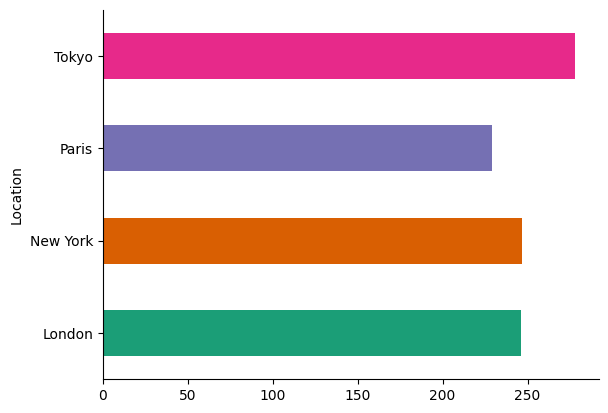

In [13]:
df.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

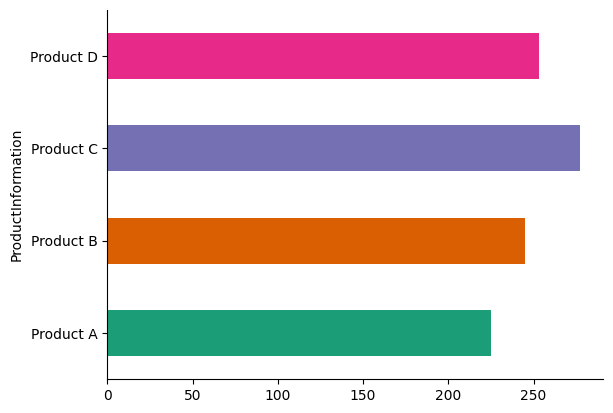

In [14]:
df.groupby('ProductInformation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

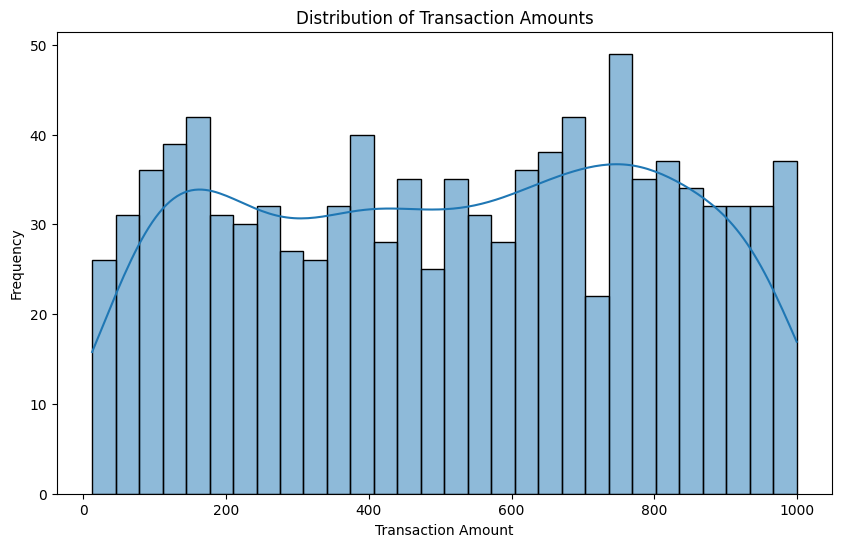

In [15]:
# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

## Grouping Data

In [ ]:
rfm = df.groupby("CustomerID").agg({
    "PurchaseDate": lambda date: (ref_date - date.max()).days,
    "OrderID": 'nunique',
    "TransactionAmount": 'sum'
}).reset_index()

rfm

,CustomerID,PurchaseDate,OrderID,TransactionAmount
0,1011,33,2,1129.02
1,1025,21,1,359.29
2,1029,0,1,704.99
3,1046,43,1,859.82
4,1049,13,1,225.72
...,...,...,...,...
941,9941,42,1,960.53
942,9950,38,1,679.11
943,9954,12,1,798.01
944,9985,57,1,36.10


## Counting RFM (Recency, Frequency, and Monetary)

In [ ]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
# Buat skor berdasarkan kuantile
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Gabungkan skor RFM
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1011,33,2,1129.02,3,5,5,355
1,1025,21,1,359.29,4,1,2,412
2,1029,0,1,704.99,5,1,4,514
3,1046,43,1,859.82,2,1,5,215
4,1049,13,1,225.72,4,1,2,412
...,...,...,...,...,...,...,...,...
941,9941,42,1,960.53,2,5,5,255
942,9950,38,1,679.11,2,5,4,254
943,9954,12,1,798.01,5,5,4,554
944,9985,57,1,36.10,1,5,1,151


## Segmenting Data

In [ ]:
# Ubah nilai R_Score, F_Score, dan M_Score menjadi integer
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

In [ ]:
# Fungsi segmentasi berdasarkan nilai RFM
def segment(x):
    if x['R_Score'] == 5 and x['F_Score'] == 5 and x['M_Score'] == 5:
        return 'Champion'
    elif x['R_Score'] == 5 and x['F_Score'] >= 4:
        return 'Loyal'
    elif x['R_Score'] == 5 and x['F_Score'] <= 2:
        return 'Potential Loyalist'
    elif x['R_Score'] == 4 and x['F_Score'] >= 3:
        return 'Promising'
    elif x['R_Score'] == 3 and x['F_Score'] >= 3:
        return 'Need Attention'
    elif x['R_Score'] == 2 and x['F_Score'] >= 3:
        return 'At Risk'
    elif x['R_Score'] >= 3 and x['F_Score'] <= 3:
        return 'Engaged but Infrequent'
    elif x['R_Score'] <= 3 and x['F_Score'] >= 3:
        return 'Dormant Loyalists'
    elif x['R_Score'] <= 2 and x['F_Score'] == 5:
        return "Can't Lose Them"
    elif x['R_Score'] <= 2 and x['F_Score'] <= 2:
        return 'Lost'
    elif x['R_Score'] == 1 and x['F_Score'] == 1:
        return 'Hibernating'
    else:
        return 'Other'

# Terapkan segmentasi
rfm['Segment'] = rfm.apply(segment, axis=1)



### 1. **Champion** (R_Score = 5, F_Score = 5, M_Score = 5)
   - **Deskripsi**: Pelanggan yang paling aktif, sering berbelanja, dan mengeluarkan jumlah uang yang besar. Mereka adalah pelanggan terbaik dan sangat berharga bagi bisnis Anda.
   - **Strategi**: Berikan mereka penghargaan khusus, seperti diskon eksklusif, akses awal ke produk baru, atau program loyalitas tingkat premium.

### 2. **Loyal** (R_Score = 5, F_Score ≥ 4)
   - **Deskripsi**: Pelanggan yang tetap setia dan sering melakukan pembelian dengan jumlah uang yang cukup besar, tetapi mungkin belum pada tingkat tertinggi seperti *champion*.
   - **Strategi**: Pertahankan hubungan dengan mereka melalui komunikasi yang konsisten, seperti kampanye email atau notifikasi terkait produk baru dan penawaran khusus.

### 3. **Potential Loyalist** (R_Score = 5, F_Score ≤ 2)
   - **Deskripsi**: Pelanggan yang baru saja berbelanja namun frekuensinya masih rendah. Mereka memiliki potensi untuk menjadi lebih setia di masa mendatang.
   - **Strategi**: Dorong mereka untuk berbelanja lebih sering dengan menawarkan insentif, seperti diskon untuk pembelian berikutnya atau poin reward ekstra.

### 4. **Promising** (R_Score = 4, F_Score ≥ 3)
   - **Deskripsi**: Pelanggan yang menjanjikan karena frekuensi belanja yang mulai meningkat, meskipun mereka tidak berbelanja sebanyak pelanggan *loyal*.
   - **Strategi**: Bangun hubungan lebih lanjut dengan mereka melalui penawaran yang relevan dan layanan yang dipersonalisasi.

### 5. **Need Attention** (R_Score = 3, F_Score ≥ 3)
   - **Deskripsi**: Pelanggan yang perlu mendapatkan perhatian lebih, karena mereka pernah berbelanja secara signifikan namun aktivitas terbaru mereka menurun.
   - **Strategi**: Gunakan kampanye reaktivasi, seperti email atau notifikasi yang berisi penawaran khusus untuk menarik perhatian mereka kembali.

### 6. **At Risk** (R_Score = 2, F_Score ≥ 3)
   - **Deskripsi**: Pelanggan yang dulunya sering berbelanja, tetapi sudah cukup lama tidak melakukan transaksi.
   - **Strategi**: Kirimkan kampanye "Kami Merindukan Anda" dengan penawaran eksklusif, atau buat program khusus untuk menarik mereka kembali sebelum mereka hilang sepenuhnya.

### 7. **Engaged but Infrequent** (R_Score ≥ 3, F_Score ≤ 3)
   - **Deskripsi**: Pelanggan yang baru-baru ini berbelanja, tetapi tidak sering. Mereka cenderung lebih jarang melakukan transaksi.
   - **Strategi**: Berikan dorongan untuk meningkatkan frekuensi belanja dengan penawaran berjangka atau kupon diskon yang berlaku untuk pembelian berikutnya dalam waktu tertentu.

### 8. **Dormant Loyalists** (R_Score ≤ 3, F_Score ≥ 3)
   - **Deskripsi**: Pelanggan yang pernah aktif, namun sekarang sudah lama tidak berbelanja, meskipun mereka memiliki sejarah frekuensi belanja yang tinggi.
   - **Strategi**: Tawarkan promosi besar atau insentif untuk menarik mereka kembali ke platform atau toko Anda.

### 9. **Can't Lose Them** (R_Score ≤ 2, F_Score = 5)
   - **Deskripsi**: Pelanggan ini sangat berharga karena mereka sering berbelanja, tetapi sudah mulai menjauh atau menurun aktivitasnya. Anda tidak boleh kehilangan mereka.
   - **Strategi**: Gunakan pendekatan yang sangat personal, seperti panggilan telepon, diskon besar, atau undangan eksklusif untuk acara atau program loyalitas.

### 10. **Lost** (R_Score ≤ 2, F_Score ≤ 2)
   - **Deskripsi**: Pelanggan yang sudah sangat lama tidak berbelanja dan jarang bertransaksi. Mereka hampir tidak aktif lagi.
   - **Strategi**: Cobalah kampanye reaktivasi yang sangat menarik atau lupakan mereka dan fokus pada segmen yang lebih potensial.

### 11. **Hibernating** (R_Score = 1, F_Score = 1)
   - **Deskripsi**: Pelanggan ini pernah berbelanja tetapi hanya sekali dan sudah sangat lama tidak kembali.
   - **Strategi**: Jika memungkinkan, tawarkan mereka alasan untuk kembali dengan diskon besar atau ajakan yang relevan untuk menarik mereka dari hibernasi.

### 12. **Other**
   - **Deskripsi**: Segmen yang tidak sesuai dengan kriteria tertentu. Biasanya merupakan pelanggan dengan pola pembelian yang tidak menentu atau tidak konsisten.
   - **Strategi**: Lakukan analisis lebih lanjut untuk memahami apakah ada pola tertentu yang bisa dieksplorasi lebih jauh.

Dengan segmentasi ini, Anda bisa menargetkan setiap kelompok pelanggan secara lebih strategis, meningkatkan loyalitas, dan memaksimalkan konversi dari pelanggan yang potensial.

## Data After Segmenting

In [ ]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,1011,33,2,1129.02,3,5,5,355,Need Attention
1,1025,21,1,359.29,4,1,2,412,Engaged but Infrequent
2,1029,0,1,704.99,5,1,4,514,Potential Loyalist
3,1046,43,1,859.82,2,1,5,215,Lost
4,1049,13,1,225.72,4,1,2,412,Engaged but Infrequent
...,...,...,...,...,...,...,...,...,...
941,9941,42,1,960.53,2,5,5,255,At Risk
942,9950,38,1,679.11,2,5,4,254,At Risk
943,9954,12,1,798.01,5,5,4,554,Loyal
944,9985,57,1,36.10,1,5,1,151,Dormant Loyalists


## Visualization

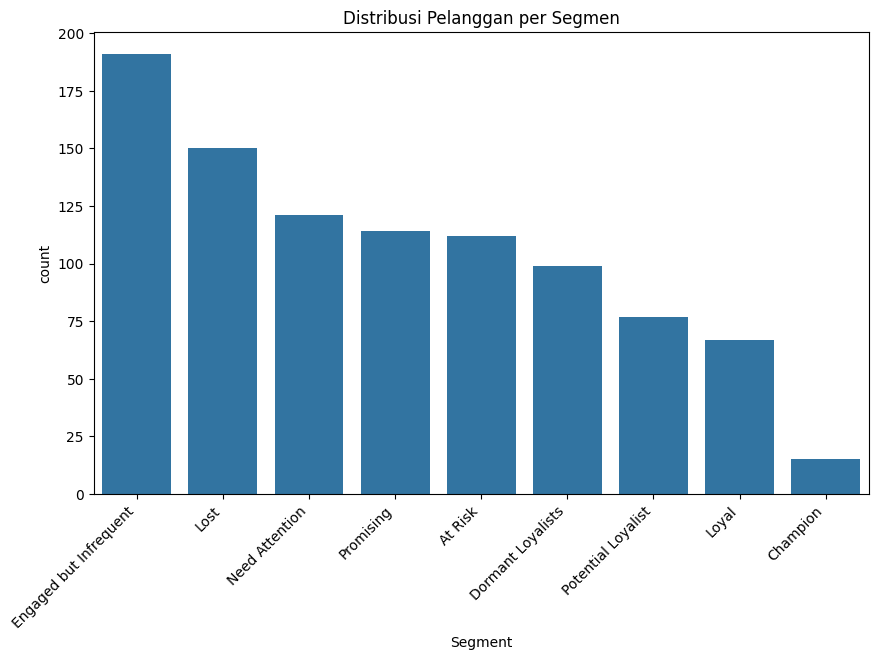

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi jumlah pelanggan per segmen
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=rfm, order=rfm['Segment'].value_counts().index)

# Miringkan label pada sumbu x
plt.xticks(rotation=45, ha='right')  # Anda dapat mengubah sudut rotasi jika perlu

plt.title('Distribusi Pelanggan per Segmen')
plt.show()
